In [17]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [18]:
file1 = glob("SS-CUDA-i0-t64-s65536.cali")
file2 = glob("SS-CUDA-i0-t256-s262144.cali")
file3 = glob("SS-CUDA-i0-t1024-s1048576.cali")
all_files = [file1[0], file2[0], file3[0]]
print(all_files)
tk = th.Thicket.from_caliperreader(all_files)

['SS-CUDA-i0-t64-s65536.cali', 'SS-CUDA-i0-t256-s262144.cali', 'SS-CUDA-i0-t1024-s1048576.cali']


In [19]:
tk.profile_mapping

OrderedDict([(205232290, 'SS-CUDA-i0-t64-s65536.cali'),
             (2687656021, 'SS-CUDA-i0-t1024-s1048576.cali'),
             (3477988594, 'SS-CUDA-i0-t256-s262144.cali')])

In [20]:
tk.dataframe

nid  \
node                                               profile           
{'name': 'main', 'type': 'function'}               205232290     1   
                                                   2687656021    1   
                                                   3477988594    1   
{'name': 'comm', 'type': 'function'}               205232290     6   
                                                   2687656021    6   
                                                   3477988594    6   
{'name': 'comm_large', 'type': 'function'}         205232290     7   
                                                   2687656021    7   
                                                   3477988594    7   
{'name': 'cudaMemcpy', 'type': 'function'}         205232290     8   
                                                   2687656021    8   
                                                   3477988594    8   
{'name': 'comp', 'type': 'function'}               205232290     3   
                                                   2687656021    3   
                                                   3477988594    3   
{'name': 'comp_large', 'type': 'function'}         205232290     5   
                                                   2687656021    5   
                                                   3477988594    5   
{'name': 'comp_small', 'type': 'function'}         205232290     4   
                                                   2687656021    4   
                                                   3477988594    4   
{'name': 'correctness_check ', 'type': 'function'} 205232290     9   
                                                   2687656021    9   
                                                   3477988594    9   
{'name': 'data_init', 'type': 'function'}          205232290     2   
                                                   2687656021    2   
                                                   3477988594    2   

                                                                spot.channel  \
node                                               profile                     
{'name': 'main', 'type': 'function'}               205232290   regionprofile   
                                                   2687656021  regionprofile   
                                                   3477988594  regionprofile   
{'name': 'comm', 'type': 'function'}               205232290   regionprofile   
                                                   2687656021  regionprofile   
                                                   3477988594  regionprofile   
{'name': 'comm_large', 'type': 'function'}         205232290   regionprofile   
                                                   2687656021  regionprofile   
                                                   3477988594  regionprofile   
{'name': 'cudaMemcpy', 'type': 'function'}         205232290   regionprofile   
                                                   2687656021  regionprofile   
                                                   3477988594  regionprofile   
{'name': 'comp', 'type': 'function'}               205232290   regionprofile   
                                                   2687656021  regionprofile   
                                                   3477988594  regionprofile   
{'name': 'comp_large', 'type': 'function'}         205232290   regionprofile   
                                                   2687656021  regionprofile   
                                                   3477988594  regionprofile   
{'name': 'comp_small', 'type': 'function'}         205232290   regionprofile   
                                                   2687656021  regionprofile   
                                                   3477988594  regionprofile   
{'name': 'correctness_check ', 'type': 'function'} 205232290   regionprofile   
                                                   2687656021  regionprofile   
                                

In [21]:
tk.metadata

,cali.caliper.version,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:cuda.gputime,spot:node.order,spot:output,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_threads,num_blocks,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,
205232290,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,SS-CUDA-i0-t64-s65536.cali,1700029982,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[../../../Sample_Sort, 0, 64, 65536]",g,SampleSort,CUDA,int,4,65536,Randomized,64,1024,16,AI
2687656021,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,SS-CUDA-i0-t1024-s1048576.cali,1700030536,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[../../../Sample_Sort, 0, 1024, 1048576]",g,SampleSort,CUDA,int,4,1048576,Randomized,1024,1024,16,AI
3477988594,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,SS-CUDA-i0-t256-s262144.cali,1700033226,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[../../../Sample_Sort, 0, 256, 262144]",g,SampleSort,CUDA,int,4,262144,Randomized,256,1024,16,AI


In [22]:
#tk.statsframe.dataframe["time"] = 1

In [23]:
#print(tk.tree())

In [24]:
gb = tk.groupby("InputSize")

3  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2af7aaeb8df0>, 262144: <thicket.thicket.Thicket object at 0x2af7aaec6d90>, 1048576: <thicket.thicket.Thicket object at 0x2af7aaecd100>}


In [25]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_threads"
)

In [26]:
ctk.dataframe

65536  \
                                                                 nid   
node                                               num_threads         
{'name': 'main', 'type': 'function'}               64              1   
                                                   256          <NA>   
                                                   1024         <NA>   
{'name': 'comm', 'type': 'function'}               64              6   
                                                   256          <NA>   
                                                   1024         <NA>   
{'name': 'comm_large', 'type': 'function'}         64              7   
                                                   256          <NA>   
                                                   1024         <NA>   
{'name': 'cudaMemcpy', 'type': 'function'}         64              8   
                                                   256          <NA>   
                                                   1024         <NA>   
{'name': 'comp', 'type': 'function'}               64              3   
                                                   256          <NA>   
                                                   1024         <NA>   
{'name': 'comp_large', 'type': 'function'}         64              5   
                                                   256          <NA>   
                                                   1024         <NA>   
{'name': 'comp_small', 'type': 'function'}         64              4   
                                                   256          <NA>   
                                                   1024         <NA>   
{'name': 'correctness_check ', 'type': 'function'} 64              9   
                                                   256          <NA>   
                                                   1024         <NA>   
{'name': 'data_init', 'type': 'function'}          64              2   
                                                   256          <NA>   
                                                   1024         <NA>   

                                                                               \
                                                                 spot.channel   
node                                               num_threads                  
{'name': 'main', 'type': 'function'}               64           regionprofile   
                                                   256                    NaN   
                                                   1024                   NaN   
{'name': 'comm', 'type': 'function'}               64           regionprofile   
                                                   256                    NaN   
                                                   1024                   NaN   
{'name': 'comm_large', 'type': 'function'}         64           regionprofile   
                                                   256                    NaN   
                                                   1024                   NaN   
{'name': 'cudaMemcpy', 'type': 'function'}         64           regionprofile   
                                                   256                    NaN   
                                                   1024                   NaN   
{'name': 'comp', 'type': 'function'}               64           regionprofile   
                                                   256                    NaN   
                                                   1024                   NaN   
{'name': 'comp_large', 'type': 'function'}         64           regionprofile   
                                                   256                    NaN   
                                                   1024                   NaN   
{'name': 'comp_small', 'type': 'function'}         64           regionprofile   
                                                   256                    NaN   
                                       

In [27]:
ctk.metadata

65536    \
            cali.caliper.version   
num_threads                        
64                    2.11.0-dev   
256                          NaN   
1024                         NaN   

                                                                \
                                                  spot.metrics   
num_threads                                                      
64           min#inclusive#sum#time.duration,max#inclusive#...   
256                                                        NaN   
1024                                                       NaN   

                                                         \
            spot.timeseries.metrics spot.format.version   
num_threads                                               
64                                                  2.0   
256                             NaN                 NaN   
1024                            NaN                 NaN   

                                                                  \
                        spot.options  spot.channels cali.channel   
num_threads                                                        
64           cuda.gputime,node.order  regionprofile         spot   
256                              NaN            NaN          NaN   
1024                             NaN            NaN          NaN   

                                                                           \
            spot:cuda.gputime spot:node.order                 spot:output   
num_threads                                                                 
64                       true            true  SS-CUDA-i0-t64-s65536.cali   
256                       NaN             NaN                         NaN   
1024                      NaN             NaN                         NaN   

                                                                              \
               launchdate                                          libraries   
num_threads                                                                    
64           1.700030e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
256                   NaN                                                NaN   
1024                  NaN                                                NaN   

                                                                       \
                                          cmdline cluster   Algorithm   
num_threads                                                             
64           [../../../Sample_Sort, 0, 64, 65536]       g  SampleSort   
256                                           NaN     NaN         NaN   
1024                                          NaN     NaN         NaN   

                                                                            \
            ProgrammingModel Datatype SizeOfDatatype InputSize   InputType   
num_threads                                                                  
64                      CUDA      int            4.0   65536.0  Randomized   
256                      NaN      NaN            NaN       NaN         NaN   
1024                     NaN      NaN            NaN       NaN         NaN   

                                                                    262144   \
            num_blocks group_num implementation_source cali.caliper.version   
num_threads                                                                   
64              1024.0      16.0                    AI                  NaN   
256                NaN       NaN                   NaN           2.11.0-dev   
1024               NaN       NaN                   NaN                  NaN   

                                                                \
                                                  spot.metrics   
num_threads                                                      
64                                                         NaN   
256          min#inclusive#sum#time.duration,max#inclusi

In [28]:
# Drop unwanted columns
ctk.dataframe = ctk.dataframe.reset_index().drop([("node", ""), (65536, "nid"), (1048576, "nid"), (262144, "nid"),(65536, "spot.channel"), (1048576, "spot.channel"), (262144, "spot.channel")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Min time/rank"), (1048576, "Min time/rank"), (262144, "Min time/rank"),(65536, "Max time/rank"), (1048576, "Max time/rank"), (262144, "Max time/rank"), (65536, "Avg time/rank"), (1048576, "Avg time/rank"), (262144, "Avg time/rank")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Min GPU time/rank"), (1048576, "Min GPU time/rank"), (262144, "Min GPU time/rank"),(65536, "Max GPU time/rank"), (1048576, "Max GPU time/rank"), (262144, "Max GPU time/rank"), (65536, "Avg GPU time/rank"), (1048576, "Avg GPU time/rank"), (262144, "Avg GPU time/rank"), (65536, "Total GPU time"), (1048576, "Total GPU time"), (262144, "Total GPU time")], axis=1)
# Rename index to remove tuple
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])

In [29]:
ctk.dataframe

level_0 index      65536     262144    1048576
                                             Total time Total time Total time
name               num_threads                                               
main               64                0     0  16.907336        NaN        NaN
                   256               1     1        NaN  20.128775        NaN
                   1024              2     2        NaN        NaN  25.503876
comm               64                3     3   0.000376        NaN        NaN
                   256               4     4        NaN   0.001108        NaN
                   1024              5     5        NaN        NaN   0.002751
comm_large         64                6     6   0.000353        NaN        NaN
                   256               7     7        NaN   0.001084        NaN
                   1024              8     8        NaN        NaN   0.002726
cudaMemcpy         64                9     9   0.000336        NaN        NaN
                   256              10    10        NaN   0.001058        NaN
                   1024             11    11        NaN        NaN   0.002695
comp               64               12    12  16.684609        NaN        NaN
                   256              13    13        NaN  19.769549        NaN
                   1024             14    14        NaN        NaN  25.164850
comp_large         64               15    15  16.684506        NaN        NaN
                   256              16    16        NaN  19.769426        NaN
                   1024             17    17        NaN        NaN  25.164735
comp_small         64               18    18   0.000045        NaN        NaN
                   256              19    19        NaN   0.000043        NaN
                   1024             20    20        NaN        NaN   0.000039
correctness_check  64               21    21   0.000359        NaN        NaN
                   256              22    22        NaN   0.001121        NaN
                   1024             23    23        NaN        NaN   0.003942
data_init          64               24    24   0.216363        NaN        NaN
                   256              25    25        NaN   0.351224        NaN
                   1024             26    26        NaN        NaN   0.326361

In [30]:
# Define common variables
numThreads = [64,256, 1024]
dataType = "Randomized"
functions = ["main", "comm", "comp"]

In [31]:
def plot_mpl(df, title, xlabel, ylabel, columns):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(columns)
    plt.grid(True)
    plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(numThreads)
    plt.show()
    return fig, ax

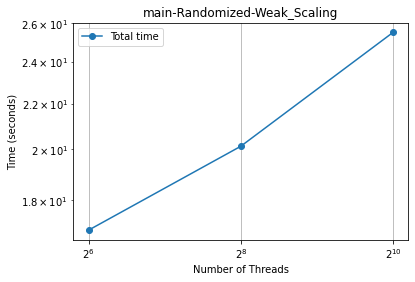

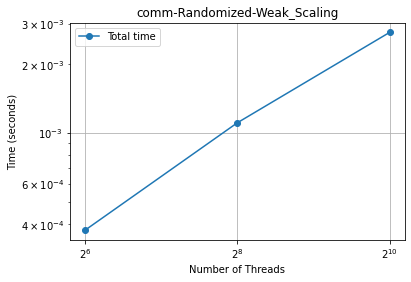

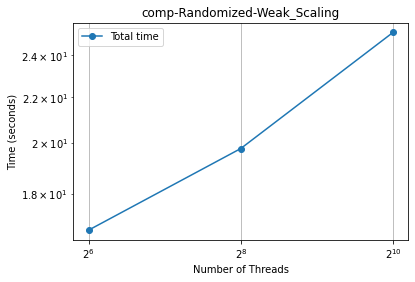

In [32]:
for func in functions:
    tempData = [ctk.dataframe.loc[func][65536].at[64, "Total time"], ctk.dataframe.loc[func][262144].at[256, "Total time"], ctk.dataframe.loc[func][1048576].at[1024, "Total time"]]
    dfTemp = pd.DataFrame(tempData, columns=["Total time"], index=numThreads) 
    plot_mpl(
                df=dfTemp,
                title= func + "-" + dataType + "-Weak_Scaling",
                xlabel="Number of Threads",
                ylabel="Time (seconds)",
                columns=["Total time"]
            )